In [811]:
#Full Name: Akhilesh Kumar
#Uplevel Email Address: 2412.akhi.photon@gmail.com
#Name of the Problem Statement of Submission: Understanding Networks through Clustering

Problem Statement:

This project aims to harness the power of machine learning techniques to delve into the intricate world of graph analysis, specifically focusing on clustering based on the local properties of nodes. The primary objective is to discern and group nodes within a given graph that exhibit shared structural properties, thus uncovering cohorts of individuals with similar characteristics or interests. This endeavour holds tremendous potential across various domains, be it for targeted marketing endeavours, community detection initiatives, or the deeper comprehension of complex social dynamics.

In [812]:
#Installing igraph for storing the data in graph structure and performing computations

In [ ]:
#pip install networkx
#import igraph as ig
#print(ig.__version__)

In [814]:
# To make a graph with nodes (chosen randomly from facebook_combined.txt file) and edges connecting nodes

In [815]:
import igraph as ig
import pandas as pd 
import random as rand
import networkx as nx

numberOfNodes = 5 #Kept 5 as each node is connected to multiple nodes and hence want to keep the number of overall nodes small
data_file = './Graph_Data/facebook_combined.txt'
df = pd.read_csv(data_file,sep=' ', header=None, names=['Node1', 'Node2'])

firstNode = rand.choice(range(1,4)) #rand.choice(df['Node1']) #pick random element TODO: Replace with df['Node1']
print('firstNode:', firstNode)
lastNode = firstNode+(numberOfNodes-1)    #select first numberOfNodes nodes for creating graph
print('lastNode:', lastNode)
df = df.loc[df['Node1'].between(firstNode, lastNode)]
print(f'Rows where the Node1 column is between {firstNode} and {lastNode}:\n',df)

df2 = df.loc[df['Node1'].between(lastNode, lastNode+numberOfNodes)]
print(f'Rows where the Node1 column is between {lastNode} and {lastNode+numberOfNodes}:\n',df)

# Convert the DataFrame to a list of tuples
edgeTuples = df.to_records(index=False).tolist()

edgeTuples2 = df2.to_records(index=False).tolist()


firstNode: 3
lastNode: 7
Rows where the Node1 column is between 3 and 7:
      Node1  Node2
372      3      9
373      3     25
374      3     26
375      3     67
376      3     72
..     ...    ...
428      7    315
429      7    322
430      7    339
431      7    340
432      7    347

[61 rows x 2 columns]
Rows where the Node1 column is between 7 and 12:
      Node1  Node2
372      3      9
373      3     25
374      3     26
375      3     67
376      3     72
..     ...    ...
428      7    315
429      7    322
430      7    339
431      7    340
432      7    347

[61 rows x 2 columns]


In [816]:
#Print graph structure using networkx
nxg = nx.Graph()
nxg.add_edges_from(edgeTuples)
print(f'Graph structure using networkx: {nxg}')

nxg2 = nx.Graph()
nxg2.add_edges_from(edgeTuples2)
print(f'Graph structure using networkx: {nxg2}')

Graph structure using networkx: Graph with 62 nodes and 61 edges
Graph structure using networkx: Graph with 20 nodes and 19 edges


In [817]:
# To extract features from graph: #Degree of all vertices

In [818]:
#create graph from tuples nodes selected in dataframe.
g = ig.Graph(edges=edgeTuples)
print(f'Graph structure using iGraph: {g}')

#Degree of all vertices
degrees = g.degree()
print(f'degrees of all vertices : {degrees}')

# Find the vertex with the maximum degree
max_degree = max(g.degree())
max_degree_vertices = [v for v in g.vs if g.degree(v) == max_degree]

# Print the vertex with the maximum degree
print(f'max_degree_vertices: {max_degree_vertices}')

# Print the maximum degree
print(f'max degree: {max_degree}')

# Find the vertex with the minimum degree
min_degree_vertex = g.vs[degrees.index(min(degrees))]

# Print the vertex with the minimum degree
print(f'min_degree_vertex: {min_degree_vertex}')







Graph structure using iGraph: IGRAPH U--- 348 61 --
+ edges:
3--9 3--25 3--26 3--67 3--72 3--85 3--122 3--142 3--170 3--188 3--200 3--228
3--274 3--280 3--283 3--323 4--78 4--152 4--181 4--195 4--218 4--273 4--275
4--306 4--328 5--87 5--122 5--156 5--158 5--169 5--180 5--187 5--204 5--213
5--235 5--315 5--316 6--89 6--95 6--147 6--219 6--319 7--22 7--31 7--38 7--65
7--87 7--103 7--129 7--136 7--168 7--213 7--246 7--291 7--304 7--308 7--315
7--322 7--339 7--340 7--347
degrees of all vertices : [0, 0, 0, 16, 9, 12, 5, 19, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [819]:
# Calculate the number of nodes in neighbour

In [820]:
#number of nodes in a neighbour within 2 hops

def get_neighborhood(graph, node):
    neighbors = set(graph.neighbors(node))
    two_hop_neighbors = set()
    for neighbor in neighbors:
        two_hop_neighbors.update(graph.neighbors(neighbor))
    return two_hop_neighbors

nodeSeries = df['Node1'].unique()
for node in nodeSeries:
    neighborhood = get_neighborhood(nxg, node)
    print("Neighborhood of node", node, "within 2 hops:", neighborhood)


Neighborhood of node 3 within 2 hops: {3, 5}
Neighborhood of node 4 within 2 hops: {4}
Neighborhood of node 5 within 2 hops: {3, 5, 7}
Neighborhood of node 6 within 2 hops: {6}
Neighborhood of node 7 within 2 hops: {5, 7}


In [821]:
# Calculate local clustering coefficient and betweenness centrality

In [822]:
# Compute local clustering coefficients
local_clustering = nx.clustering(nxg)

# Print the local clustering coefficient for each node
for node, clustering_coefficient in local_clustering.items():
    print(f"Node {node}: Local Clustering Coefficient = {clustering_coefficient}")


Node 3: Local Clustering Coefficient = 0
Node 9: Local Clustering Coefficient = 0
Node 25: Local Clustering Coefficient = 0
Node 26: Local Clustering Coefficient = 0
Node 67: Local Clustering Coefficient = 0
Node 72: Local Clustering Coefficient = 0
Node 85: Local Clustering Coefficient = 0
Node 122: Local Clustering Coefficient = 0
Node 142: Local Clustering Coefficient = 0
Node 170: Local Clustering Coefficient = 0
Node 188: Local Clustering Coefficient = 0
Node 200: Local Clustering Coefficient = 0
Node 228: Local Clustering Coefficient = 0
Node 274: Local Clustering Coefficient = 0
Node 280: Local Clustering Coefficient = 0
Node 283: Local Clustering Coefficient = 0
Node 323: Local Clustering Coefficient = 0
Node 4: Local Clustering Coefficient = 0
Node 78: Local Clustering Coefficient = 0
Node 152: Local Clustering Coefficient = 0
Node 181: Local Clustering Coefficient = 0
Node 195: Local Clustering Coefficient = 0
Node 218: Local Clustering Coefficient = 0
Node 273: Local Cluster

In [823]:
#Compute eigenvector centrality. Eigenvector centrality is a graph theory metric that measures a node's influence
#in a network. It's a centrality index that considers the centrality of a node's connections, not just the 
#number of connections it has

In [824]:
eigenvector_centrality = nx.eigenvector_centrality(nxg)

# Print eigenvector_centrality for each node
for node, eigenvector_centrality_item in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality  = {eigenvector_centrality_item}")



Node 3: Eigenvector Centrality  = 0.06054066179031181
Node 9: Eigenvector Centrality  = 0.01349311087967083
Node 25: Eigenvector Centrality  = 0.01349311087967083
Node 26: Eigenvector Centrality  = 0.01349311087967083
Node 67: Eigenvector Centrality  = 0.01349311087967083
Node 72: Eigenvector Centrality  = 0.01349311087967083
Node 85: Eigenvector Centrality  = 0.01349311087967083
Node 122: Eigenvector Centrality  = 0.06924202395011056
Node 142: Eigenvector Centrality  = 0.01349311087967083
Node 170: Eigenvector Centrality  = 0.01349311087967083
Node 188: Eigenvector Centrality  = 0.01349311087967083
Node 200: Eigenvector Centrality  = 0.01349311087967083
Node 228: Eigenvector Centrality  = 0.01349311087967083
Node 274: Eigenvector Centrality  = 0.01349311087967083
Node 280: Eigenvector Centrality  = 0.01349311087967083
Node 283: Eigenvector Centrality  = 0.01349311087967083
Node 323: Eigenvector Centrality  = 0.01349311087967083
Node 4: Eigenvector Centrality  = 5.3112802927275804e-14


In [825]:
#betweenness centrality

In [826]:
betweenness_centrality = nx.betweenness_centrality(nxg)

# Print betweenness_centrality for each node
for node, betweenness_centrality_item in betweenness_centrality.items():
    print(f"Node {node}: betweenness Centrality  = {betweenness_centrality_item}")

Node 3: betweenness Centrality  = 0.30327868852459017
Node 9: betweenness Centrality  = 0.0
Node 25: betweenness Centrality  = 0.0
Node 26: betweenness Centrality  = 0.0
Node 67: betweenness Centrality  = 0.0
Node 72: betweenness Centrality  = 0.0
Node 85: betweenness Centrality  = 0.0
Node 122: betweenness Centrality  = 0.253551912568306
Node 142: betweenness Centrality  = 0.0
Node 170: betweenness Centrality  = 0.0
Node 188: betweenness Centrality  = 0.0
Node 200: betweenness Centrality  = 0.0
Node 228: betweenness Centrality  = 0.0
Node 274: betweenness Centrality  = 0.0
Node 280: betweenness Centrality  = 0.0
Node 283: betweenness Centrality  = 0.0
Node 323: betweenness Centrality  = 0.0
Node 4: betweenness Centrality  = 0.019672131147540982
Node 78: betweenness Centrality  = 0.0
Node 152: betweenness Centrality  = 0.0
Node 181: betweenness Centrality  = 0.0
Node 195: betweenness Centrality  = 0.0
Node 218: betweenness Centrality  = 0.0
Node 273: betweenness Centrality  = 0.0
Node 

In [827]:
# Compute degree centrality

In [ ]:
degree_centrality = nx.degree_centrality(nxg)

# Print degree centrality for each node
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality}")

In [ ]:
# Compute closeness centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(nxg)

# Print closeness centrality for each node
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

In [ ]:
#Implementing Deepwalk using Node2Vec involves generating random walks on the graph and then training a SkipGram 
#model to learn node embeddings from the generated random walks. 
#Below is a Python implementation of Node2Vec using the Node2Vec class from the node2vec library:

In [ ]:
import networkx as nx
from node2vec import Node2Vec

def node2vec_embedding(graph, dimensions=2, walk_length=80, num_walks=10, p=1, q=1, window=10, workers=1, iterations=1):
    """
    Compute node embeddings using Node2Vec.

    Parameters:
        graph (nxg): The input graph.
        dimensions (int): The dimensionality of the node embeddings.
        walk_length (int): The length of each random walk.
        num_walks (int): The number of random walks to generate for each node.
        p (float): Return parameter (controls the likelihood of immediately revisiting a node in the walk).
        q (float): In-out parameter (controls the likelihood of visiting a node that's closer or farther away from the current node in the walk).
        window (int): The maximum distance between the current and predicted word within a sentence.
        workers (int): The number of worker threads to train the model.
        iterations (int): The number of iterations over the walks.

    Returns:
        dict: A dictionary mapping nodes to their embeddings.
    """
    # Precompute probabilities and generate walks
    node2vec = Node2Vec(graph, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, p=p, q=q, workers=workers)
    model = node2vec.fit(window=window, min_count=1, batch_words=4)

    # Create node embeddings dictionary
    embeddings = {str(node): model.wv[str(node)] for node in graph.nodes()}

    return embeddings

# Compute node embeddings using Node2Vec
embeddings = node2vec_embedding(nxg)

# Print node embeddings
for node, embedding in embeddings.items():
    print(f"Node {node}: {embedding}")


In [ ]:
# Compute PageRank
pagerank = nx.pagerank(nxg)

# Print PageRank scores
for node, score in pagerank.items():
    print(f"Node {node}: PageRank  = {score:.4f}")

In [ ]:
# Calculate adjacency matrix
#Adjacency matrix is a sparse matrix where “1” indicates that there is a connection between two nodes.

In [ ]:
adjacency_matrix = nx.adjacency_matrix(nxg).todense()
print(f'Adjacency Matrix: {adjacency_matrix}')


In [ ]:
# Calculate Laplacian matrix
#The Laplacian matrix contains the same information about the connectivity as the adjacency matrix but in a slightly different way. It is simply defined as:
#Laplacian matrix equation. L — Laplacian matrix, D — degree matrix, A — adjacency matrix
#In this equation, L is the Laplacian matrix, D is the degree matrix, and A is the adjacency matrix. 
#The degree matrix is simply a diagonal matrix where each element on the diagonal represent how many neighbours 
#each node has.


In [ ]:
laplacian_matrix = nx.laplacian_matrix(nxg).todense()
print(f'Laplacian Matrix: {laplacian_matrix}')


In [ ]:
#Bag of Nodes
#It is not a single metric but rather a type. The idea behind it is quite simple — 
#we just aggregate node level features in some way [1]. For example, we can take a mean of node degrees, 
#or a histogram of the edge connections.

In [ ]:
import networkx as nx
import numpy as np

def bag_of_nodes_mean_degree(graph):
    """
    Compute the Bag of Nodes representation by taking the mean of node degrees.

    Parameters:
        graph (nxg): The input graph.

    Returns:
        float: The mean degree of all nodes in the graph.
    """
    degrees = [degree for node, degree in graph.degree()]
    return np.mean(degrees)

def bag_of_nodes_edge_histogram(graph):
    """
    Compute the Bag of Nodes representation by computing a histogram of edge connections.

    Parameters:
        graph (nxg): The input graph.

    Returns:
        np.array: The histogram of edge connections.
    """
    histogram = np.histogram(list(dict(graph.degree()).values()), bins=np.arange(0, max(dict(graph.degree()).values()) + 2))[0]
    return histogram

# Compute Bag of Nodes using mean degree
mean_degree_representation = bag_of_nodes_mean_degree(nxg)
print("Bag of Nodes Representation (Mean Degree):", mean_degree_representation)

# Compute Bag of Nodes using edge histogram
edge_histogram_representation = bag_of_nodes_edge_histogram(nxg)
print("Bag of Nodes Representation (Edge Histogram):", edge_histogram_representation)


In [ ]:
#Implement Graphlet Kernels
#Counting all possible graphlets of size 3 from the graph

In [ ]:
import networkx as nx
import numpy as np

def compute_graphlet_degree_vector(G, k):
    """
    Compute the graphlet degree vector of a graph.

    Parameters:
        G (nxg): The input graph.
        k (int): The size of graphlets (k <= 4).

    Returns:
        np.ndarray: The graphlet degree vector.
    """
    n = len(G)
    graphlet_degree_vector = np.zeros((1, 2**k), dtype=int)

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        num_neighbors = len(neighbors)
        
        if k == 2:
            for i in range(num_neighbors):
                for j in range(i + 1, num_neighbors):
                    u, v = neighbors[i], neighbors[j]
                    if G.has_edge(u, v):
                        index = int('0b' + '1' * (2**k), 2)
                        graphlet_degree_vector[0][index] += 1
        elif k == 3:
            for i in range(num_neighbors):
                for j in range(i + 1, num_neighbors):
                    for l in range(j + 1, num_neighbors):
                        u, v, w = neighbors[i], neighbors[j], neighbors[l]
                        if G.has_edge(u, v) and G.has_edge(u, w) and G.has_edge(v, w):
                            index = int('0b' + '1' * (2**k), 2)
                            graphlet_degree_vector[0][index] += 1
        elif k == 4:
            for i in range(num_neighbors):
                for j in range(i + 1, num_neighbors):
                    for l in range(j + 1, num_neighbors):
                        for m in range(l + 1, num_neighbors):
                            u, v, w, x = neighbors[i], neighbors[j], neighbors[l], neighbors[m]
                            if G.has_edge(u, v) and G.has_edge(u, w) and G.has_edge(u, x) and \
                               G.has_edge(v, w) and G.has_edge(v, x) and G.has_edge(w, x):
                                index = int('0b' + '1' * (2**k), 2)
                                graphlet_degree_vector[0][index] += 1

    return graphlet_degree_vector / n

def graphlet_kernel(G1, G2, k):
    """
    Compute the Graphlet kernel between two graphs.

    Parameters:
        G1 (nxg): The first input graph.
        G2 (nxg2): The second input graph.
        k (int): The size of graphlets (k <= 4).

    Returns:
        float: The Graphlet kernel value.
    """
    vector1 = compute_graphlet_degree_vector(G1, k)
    vector2 = compute_graphlet_degree_vector(G2, k)

    kernel_value = np.dot(vector1, vector2.T)

    return kernel_value[0][0]

# Compute the Graphlet kernel
k = 3
kernel_value = graphlet_kernel(nxg, nxg2, k)

# Print the Graphlet kernel value
print(f"Graphlet Kernel Value (k={k}):", kernel_value)


In [ ]:
#Path-based kernels are a type of graph kernel that measure the similarity between graphs based on the 
#shared paths between nodes. One common approach is to compute the average or sum of the lengths of common 
#paths between all pairs of nodes in the graphs.


In [ ]:
import networkx as nx

def compute_paths(G):
    """
    Compute the paths between all pairs of nodes in the graph 

    Parameters:
        G (nxg): The input graph.

    Returns:
        dict: A dictionary containing the paths between all pairs of nodes.
    """
    paths = {}
    for node1 in G.nodes():
        paths[node1] = {}
        for node2 in G.nodes():
            if node1 != node2:
                try:
                    path = nx.shortest_path(G, source=node1, target=node2)
                    paths[node1][node2] = path
                except nx.NetworkXNoPath:
                    paths[node1][node2] = []
    return paths

def path_kernel(G1, G2):
    """
    Compute the path-based kernel between two graphs.

    Parameters:
        G1 (nxg): The first input graph.
        G2 (nxg): The second input graph.

    Returns:
        float: The path-based kernel value.
    """
    paths1 = compute_paths(G1)
    paths2 = compute_paths(G2)

    common_paths = 0
    for node1 in paths1:
        for node2 in paths1[node1]:
            if paths1[node1][node2] in paths2[node1].values():
                common_paths += 1

    kernel_value = common_paths / (len(G1) * len(G2))
    return kernel_value

# Compute the path-based kernel for all pairs of nodes within the same subset of the graph
kernel_value = path_kernel(nxg, nxg)

# Print the path-based kernel value
print("Path-based Kernel Value:", kernel_value)


In [ ]:
#Neighbourhood Overlap Features - Local Overlap Measures
#Sorensen index between node u and v. The numerator in this equation counts the common neighbours between those 
#nodes. Denominator is a normalization constant and is a sum of nodes’ degrees. Modified from [1]
#The numerator term counts the common neighbours between those nodes. The denominator term (d_u + d_v)/2 is 
#an average of nodes’ degrees.


In [ ]:
import networkx as nx

def compute_sorenson_index(graph, node_u, node_v):
    """
    Compute the Sorenson index between two nodes in a graph.

    Parameters:
        graph (nxg): The input graph.
        node_u: The first node.
        node_v: The second node.

    Returns:
        float: The Sorenson index between the neighborhoods of node_u and node_v.
    """
    neighbors_u = set(graph.neighbors(node_u))
    neighbors_v = set(graph.neighbors(node_v))

    intersection_size = len(neighbors_u.intersection(neighbors_v))
    union_size = len(neighbors_u) + len(neighbors_v)

    if union_size == 0:
        return 0
    else:
        sorenson_index = 2.0 * intersection_size / union_size
        return sorenson_index

# Compute the Sorenson index between nodes 1 and 4
node_u = firstNode
node_v = lastNode
sorenson_index = compute_sorenson_index(nxg, node_u, node_v)

# Print the Sorenson index
print(f"Sorenson index between nodes {node_u} and {node_v}: {sorenson_index}")


In [ ]:
#Apply DBSCAN clustering

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Calculate adjacency matrix
adjacency_matrix = nx.adjacency_matrix(nxg).todense()

# Convert adjacency matrix to numpy array
adjacency_array = np.array(adjacency_matrix)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=2)
clusters = dbscan.fit_predict(adjacency_array)


# Print the cluster assignments for each node
for node, cluster in enumerate(clusters):
    print(f"Node {node}: Cluster = {cluster}")


In [ ]:
# Visualize the graph with colored clusters
pos = nx.spring_layout(nxg,scale = 100000000000, iterations = 10)  # Layout for visualization
#pos = nx.circular_layout(nxg, dim=2)  



# Draw nodes with colors based on their cluster assignments
nx.draw(nxg, pos, node_color=clusters, cmap=plt.cm.jet, with_labels=True)

# Display the plot
plt.show()

In [ ]:
#BIRCH - BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering 
#algorithm that is suitable for clustering large datasets. 

#However, BIRCH is typically designed for numerical data and may not be directly applicable to graph data 
#represented by NetworkX.

#To implement BIRCH clustering algorithm for graph data in 2D, we can extract 2D features from the graph nodes 
#and then apply BIRCH clustering on these features. In this example, we'll use the node coordinates as the 2D 
#features.

In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import Birch

def extract_2d_features(graph):
    """
    Extract 2D features (node coordinates) from the nodes in the graph.

    Parameters:
        graph (nxg): The input graph.

    Returns:
        ndarray: Array of 2D features (node coordinates).
    """
    nodes = list(graph.nodes())
    features = [list(graph.nodes[node]['pos']) for node in nodes]  # Assuming 'pos' attribute contains 2D coordinates
    return np.array(features)

def birch_clustering_2d(graph, threshold=0.5, branching_factor=50, n_clusters=None):
    """
    Perform BIRCH clustering on graph data with 2D features.

    Parameters:
        graph (nxg): The input graph.
        threshold (float): The radius of the subcluster to be used as the criterion to merge two subclusters.
        branching_factor (int): Maximum number of CF (Clustering Feature) entries in a single node.
        n_clusters (int): The number of clusters to form.

    Returns:
        dict: A dictionary mapping nodes to their cluster labels.
    """
    # Extract 2D features
    features_2d = extract_2d_features(graph)

    # Initialize and fit BIRCH clustering algorithm
    birch = Birch(threshold=threshold, branching_factor=branching_factor, n_clusters=n_clusters)
    birch.fit(features_2d)

    # Retrieve cluster labels
    cluster_labels = birch.labels_

    # Create a dictionary mapping nodes to cluster labels
    node_cluster_mapping = {list(graph.nodes())[i]: cluster_labels[i] for i in range(len(cluster_labels))}

    return node_cluster_mapping

# Set 2D node coordinates (replace this with your own node coordinates)
for node in nxg.nodes():
    nxg.nodes[node]['pos'] = np.random.rand(2) * 10  # Random 2D coordinates between [0, 10)

# Perform BIRCH clustering with 2D features
node_cluster_mapping = birch_clustering_2d(nxg)

# Print node cluster assignments
for node, cluster in node_cluster_mapping.items():
    print(f"Node {node}: Cluster {cluster}")


In [ ]:
#Optimizing KMeans using Silhouette Analysis
#Demonstrating how to optimize the number of clusters (n_clusters) for KMeans using silhouette analysis:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Generate sample data (replace this with your own data)
X = np.random.rand(lastNode, 2)

# Initialize empty lists to store silhouette scores
silhouette_scores = []

# Define range of n_clusters values to experiment with
n_clusters_range = range(2, 5)

# Iterate over n_clusters values
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.n_init = 10
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different n_clusters values
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Find optimal number of clusters
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")


In [ ]:
#To evaluate the clustering performance using metrics such as silhouette score, Calinski-Harabasz index, and Davies-Bouldin index, you can use scikit-learn, which provides implementations of these metrics. Here's how you can do it:

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# 3. Apply a clustering algorithm to the graph
kmeans = KMeans(n_clusters=2)
kmeans.n_init = 10
labels = kmeans.fit_predict(adjacency_array)

# 4. Compute clustering evaluation metrics
silhouette = silhouette_score(adjacency_array, labels)
calinski_harabasz = calinski_harabasz_score(adjacency_array, labels)
davies_bouldin = davies_bouldin_score(adjacency_array, labels)

# 5. Print the evaluation metrics
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


In [ ]:
#implement community detection algorithm

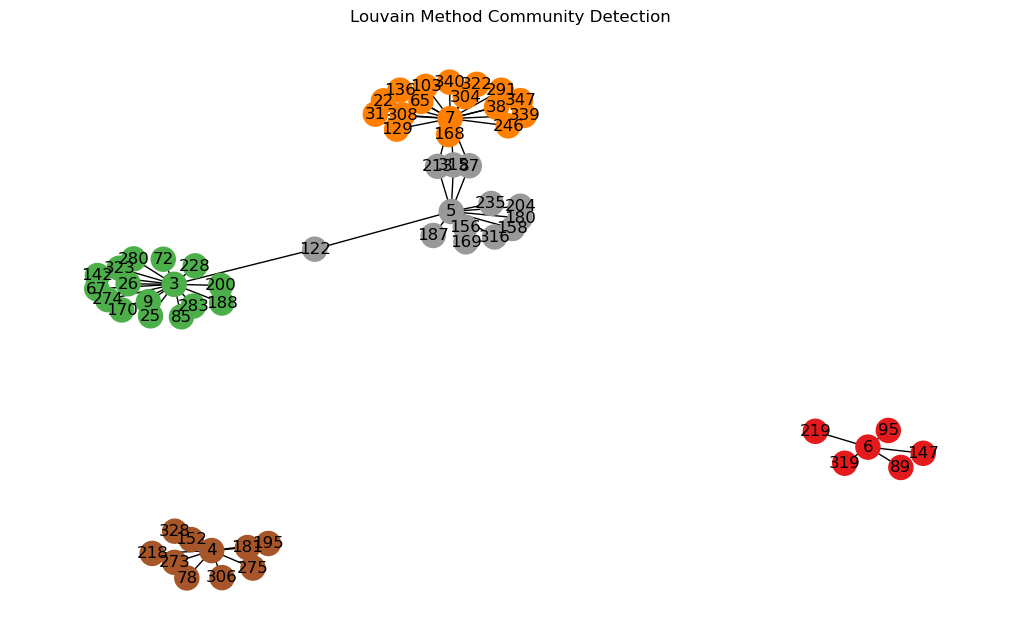

Detected Communities:
Community 1: [3, 9, 25, 26, 67, 72, 85, 142, 170, 188, 200, 228, 274, 280, 283, 323]
Community 4: [122, 5, 87, 156, 158, 169, 180, 187, 204, 213, 235, 315, 316]
Community 3: [4, 78, 152, 181, 195, 218, 273, 275, 306, 328]
Community 0: [6, 89, 95, 147, 219, 319]
Community 2: [7, 22, 31, 38, 65, 103, 129, 136, 168, 246, 291, 304, 308, 322, 339, 340, 347]


In [828]:
#!pip install python-louvain
from community import community_louvain


# Perform community detection using the Louvain method
partition = community_louvain.best_partition(nxg)

# Visualize the communities
pos = nx.spring_layout(nxg)  # Position nodes using the spring layout algorithm

plt.figure(figsize=(10, 6))
nx.draw(nxg, pos, node_color=list(partition.values()), cmap=plt.cm.Set1, with_labels=True)
plt.title('Louvain Method Community Detection')
plt.show()

# Analyze and print communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

print("Detected Communities:")
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")
